In [3]:
import pandas as pd
import numpy as np

# ML & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load cleaned dataset
df = pd.read_csv('dataclean.csv')


In [5]:
# Drop date columns and high cardinality ones
df_model = df.drop(columns=[
    'reservation_status_date', 'arrival_date_month', 'agent', 'company',
    'reservation_status', 'country'
])

# Convert categorical features to numbers
cat_cols = df_model.select_dtypes(include='object').columns
df_model[cat_cols] = df_model[cat_cols].apply(LabelEncoder().fit_transform)


In [7]:
# Drop date columns and high cardinality ones
df_model = df.drop(columns=[
    'reservation_status_date', 'arrival_date_month', 'agent', 'company',
    'reservation_status', 'country'
])

# Convert categorical features to numbers
cat_cols = df_model.select_dtypes(include='object').columns
df_model[cat_cols] = df_model[cat_cols].apply(LabelEncoder().fit_transform)


In [9]:
# Define features and target
X = df_model.drop('is_canceled', axis=1)
y = df_model['is_canceled']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8719986543879568

Confusion Matrix:
 [[13931  1018]
 [ 2026  6806]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     14949
           1       0.87      0.77      0.82      8832

    accuracy                           0.87     23781
   macro avg       0.87      0.85      0.86     23781
weighted avg       0.87      0.87      0.87     23781



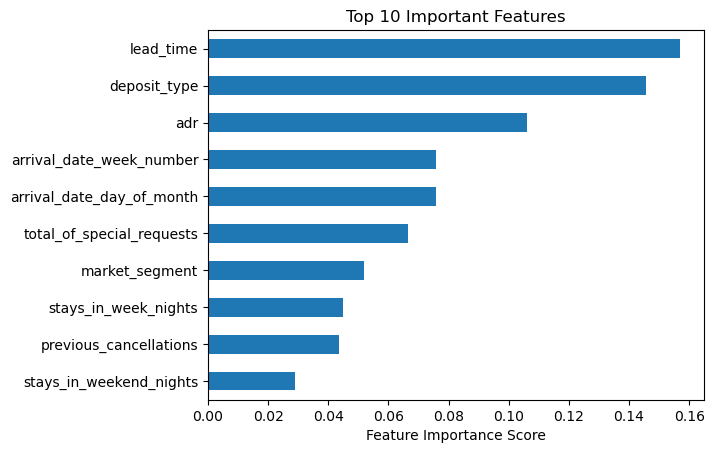

In [13]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.show()


In [25]:
import joblib


joblib.dump(model, 'modeling_cancellation_prediction.joblib')


joblib.dump(X.columns.tolist(), 'PredictionModelFeature.joblib')

print("✅ Model and feature list saved.")


✅ Model and feature list saved.
